In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.style.use("ggplot")

In [2]:
with open (r"data\matches\72\30.json", "r") as f:
	obj = json.load(f)

In [3]:
mlist = []
objlist = []
dflist = []
for match in obj:
	mid = match["match_id"]
	mlist.append(mid)

In [4]:
mlist = [str(m) for m in mlist]
mlist = [m+".json" for m in mlist]

In [5]:
for n in mlist:
	file = "data/events" + "/" + n
	with open (file, "r", encoding='utf-8-sig') as f:
		obj = json.load(f)
		objlist.append(obj)

In [6]:
for obj in objlist:
    df = json_normalize(obj)
    dflist.append(df)

In [7]:
result = pd.concat(dflist, sort=True)

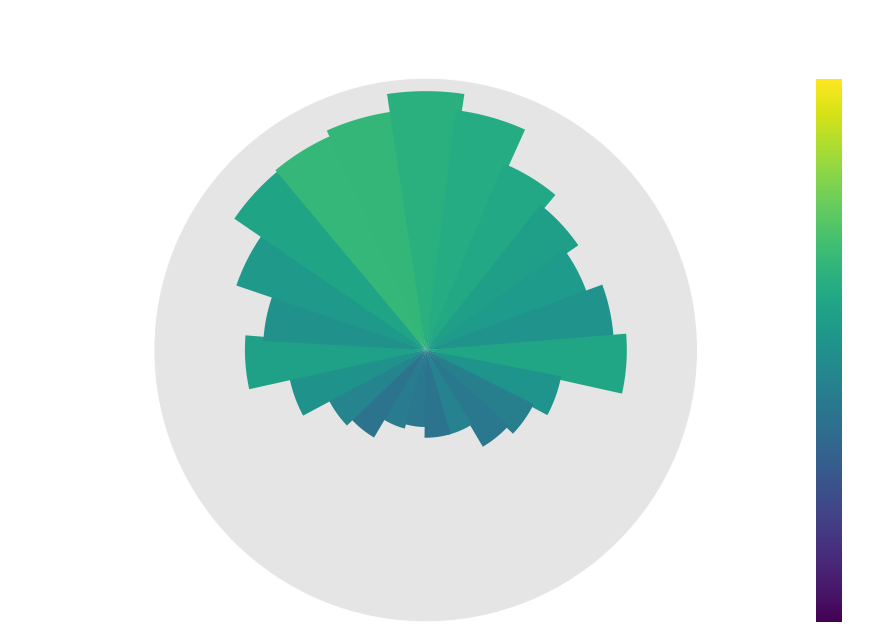

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

norm = plt.Normalize(result["pass.length"].min(), 40)#result["pass.length"].max())
cmap = plt.cm.viridis
ar = np.array(result["pass.length"])
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.035, pad=0.01)
cbar.ax.tick_params(colors = 'white')

def Pass_Plotter(num, team):

    local_df = result.copy(deep=True)
    local_df = local_df[local_df["type.name"]=="Pass"]
    local_df = local_df[local_df["team.name"]==team]
    local_df = local_df.dropna(axis=1, how="all")
    
    df1 = local_df[['pass.angle','pass.length']].copy()
    
    bins = np.linspace(-np.pi,np.pi,24)

    df1['binned'] = pd.cut(local_df['pass.angle'], bins, include_lowest=True, right = True)
    df1["Bin_Mids"] = df1["binned"].apply(lambda x: x.mid)

    A= df1.groupby("Bin_Mids", as_index=False)["pass.length"].mean()
    B= df1.groupby("Bin_Mids", as_index=False)["pass.length"].count()
    A = A.dropna(0)
    B = B[B["pass.length"] != 0]
    A = pd.merge(A,B, on = "Bin_Mids")
    A.columns = ["Bin_Mids", "pass.length", "Frequency"]
    A['Bin_Mids'] = A['Bin_Mids'].astype(np.float64)
    A["Bin_Mids"] = A["Bin_Mids"] * -1

    axs = fig.add_subplot(1,1,num+1, projection="polar")
    bars = axs.bar(A["Bin_Mids"], A["Frequency"], width=0.3, bottom=0.0)
    title = team
    cm = cmap(norm(np.array(A["pass.length"])))
#     axs.title.set_text(title)
#     axs.title.set_size(8)
#     axs.title.set_position([.5, 1.1])
    axs.set_xticklabels([])
    axs.set_yticks([])
    axs.yaxis.grid(False)
    axs.xaxis.grid(False)
    axs.set_theta_offset(np.pi/2)
    for r, bar in zip(cm, bars):
            bar.set_facecolor(r)
    
    
   
#for num, team in enumerate(result["team.name"].unique()):
Pass_Plotter(0, 'United States Women\'s')
fig.subplots_adjust(hspace = 0.6, wspace=0.1) 
ax.axis("off")
fig.suptitle("USA Pass Sonar - FIFA WWC 19", fontsize = 19, fontweight="bold", color = 'white')
plt.savefig('VizPlots/Pass Sonar/us.png', facecolor = '#135476', dpi = 1000)

In [18]:
result.loc[(result['team.id'] != 1214),'team.name'] = 'Rest of the world'

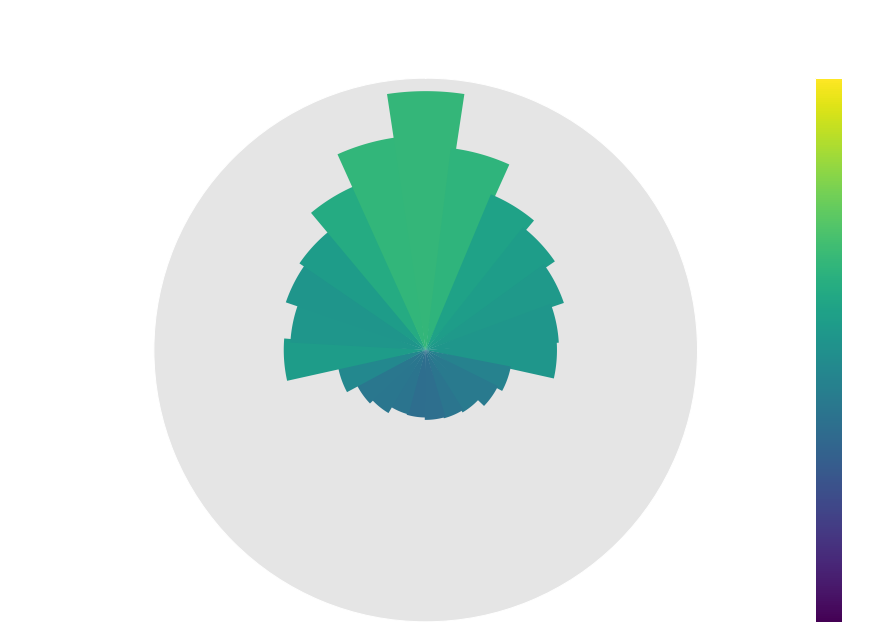

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

norm = plt.Normalize(result["pass.length"].min(), 40)#result["pass.length"].max())
cmap = plt.cm.viridis
ar = np.array(result["pass.length"])
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.035, pad=0.01)
cbar.ax.tick_params(colors = 'white')

Pass_Plotter(0, 'Rest of the world')
fig.subplots_adjust(hspace = 0.6, wspace=0.1) 
ax.axis("off")
fig.suptitle("Rest of the world Pass Sonar - FIFA WWC 19", fontsize = 19, fontweight="bold", color = 'white')
plt.savefig('VizPlots/Pass Sonar/row.png', facecolor = '#135476', dpi = 1000)
# plt.show()

In [24]:
result.loc[(result['team.id'] == 851),'team.name'] = 'Netherlands Women\'s'

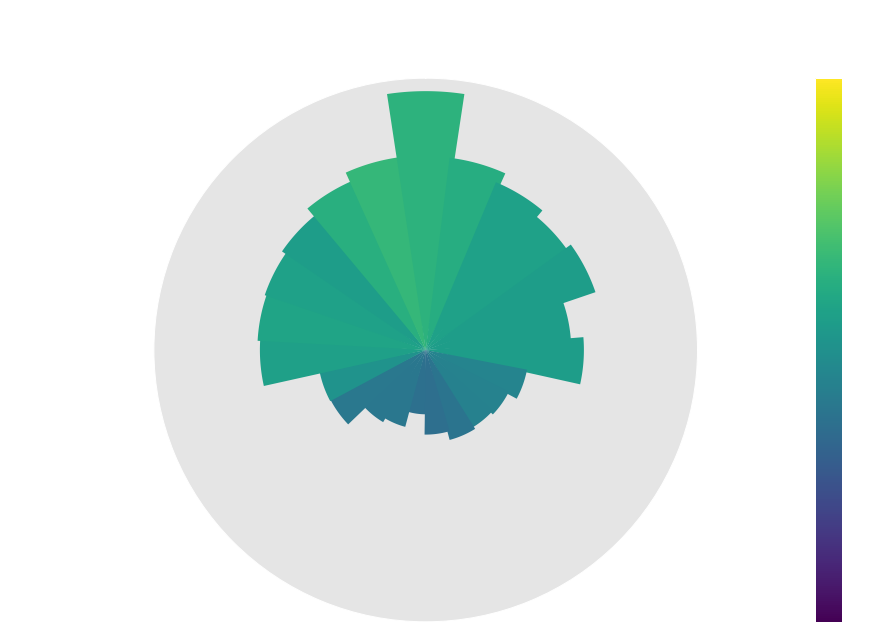

In [25]:
fig, ax = plt.subplots(figsize=(15,10))

norm = plt.Normalize(result["pass.length"].min(), 40)#result["pass.length"].max())
cmap = plt.cm.viridis
ar = np.array(result["pass.length"])
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.035, pad=0.01)
cbar.ax.tick_params(colors = 'white')

Pass_Plotter(0, 'Netherlands Women\'s')
fig.subplots_adjust(hspace = 0.6, wspace=0.1) 
ax.axis("off")
fig.suptitle("Netherlands Pass Sonar - FIFA WWC 19", fontsize = 19, fontweight="bold", color = 'white')
plt.savefig('VizPlots/Pass Sonar/ned.png', facecolor = '#135476', dpi = 1000)
# plt.show()

In [26]:
result.loc[(result['team.id'] == 858),'team.name'] = 'Sweden Women\'s'

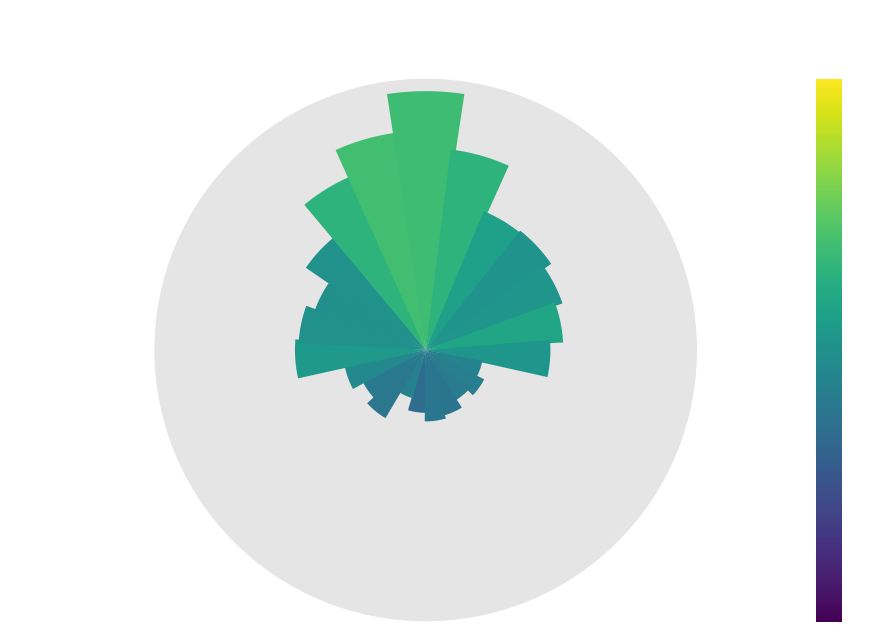

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

norm = plt.Normalize(result["pass.length"].min(), 40)#result["pass.length"].max())
cmap = plt.cm.viridis
ar = np.array(result["pass.length"])
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.035, pad=0.01)
cbar.ax.tick_params(colors = 'white')

Pass_Plotter(0, 'Sweden Women\'s')
fig.subplots_adjust(hspace = 0.6, wspace=0.1) 
ax.axis("off")
fig.suptitle("Sweden Pass Sonar - FIFA WWC 19", fontsize = 19, fontweight="bold", color = 'white')
plt.savefig('VizPlots/Pass Sonar/swe.png', facecolor = '#135476', dpi = 1000)
# plt.show()